# 06 Temporal Reasoning Eval

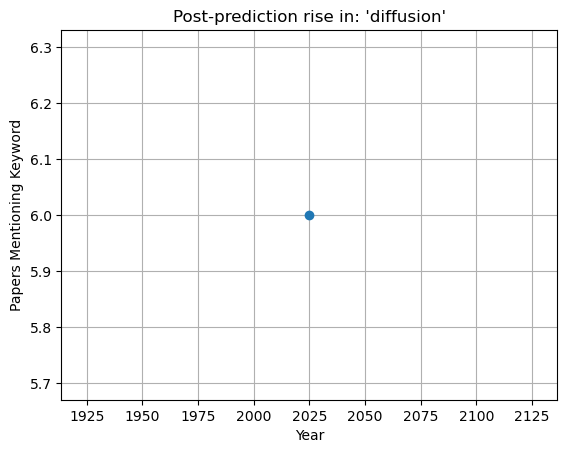

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs("../data/raw", exist_ok=True)

df = pd.read_csv("../data/raw/arxiv_papers.csv")
df['published'] = pd.to_datetime(df['published'])
df['year'] = df['published'].dt.year

keyword = "diffusion"
df['has_keyword'] = df['summary'].str.lower().str.contains(keyword)

yearly = df.groupby("year")['has_keyword'].sum().reset_index()

plt.plot(yearly["year"], yearly["has_keyword"], marker='o')
plt.title(f"Post-prediction rise in: '{keyword}'")
plt.xlabel("Year")
plt.ylabel("Papers Mentioning Keyword")
plt.grid(True)
plt.show()